In [38]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests import *
from utils import *
%matplotlib inline

In [39]:
X_train = np.array(
    [
        [1, 1, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 1],
        [0, 1, 1],
        [0, 0, 0],
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
    ]
)


y_train = np.array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [40]:
print("The shape of X_train is:", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("Number of training examples (m):", len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


In [41]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)
    
print(entropy(0.5)) #độ chính xác của dữ liệu thấp dần từ 0 đến 1

1.0


In [42]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have 
    that feature = 1 and the right node those that have the feature = 0 
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [43]:
split_indices(X_train, 2)

([0, 1, 4, 5, 7], [2, 3, 6, 8, 9])

In [44]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [45]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [46]:
left_indices, right_indices = split_indices(X_train, 0)
information_gain(X_train, y_train, left_indices, right_indices)

np.float64(0.034851554559677034)

In [47]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(0,3):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {i}, information gain if we split the root node using this feature: {i_gain}")

Feature: 0, information gain if we split the root node using this feature: 0.034851554559677034
Feature: 1, information gain if we split the root node using this feature: 0.12451124978365313
Feature: 2, information gain if we split the root node using this feature: 0.2780719051126377


In [48]:
def get_best_split(X, y, node_indices):   

    # Some useful variables
    num_features = X.shape[1]
    # You need to return the following variables correctly
    best_feature = -1
    ### BEGINNING SOLUTION
    max_info_gain = 0
    # Iterate through all features
    for feature in range(num_features): 
        
        # Your code here to compute the information gain from splitting on this feature
        left_indices, right_indices = split_indices(X_train, feature)
        info_gain = information_gain(X_train, y_train, left_indices, right_indices)
        
        # If the information gain is larger than the max seen so far
        if info_gain > max_info_gain:  
            # Your code here to set the max_info_gain and best_feature
            max_info_gain = info_gain
            best_feature = feature
    ### ENDING SOLUTION    
   
    return best_feature

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


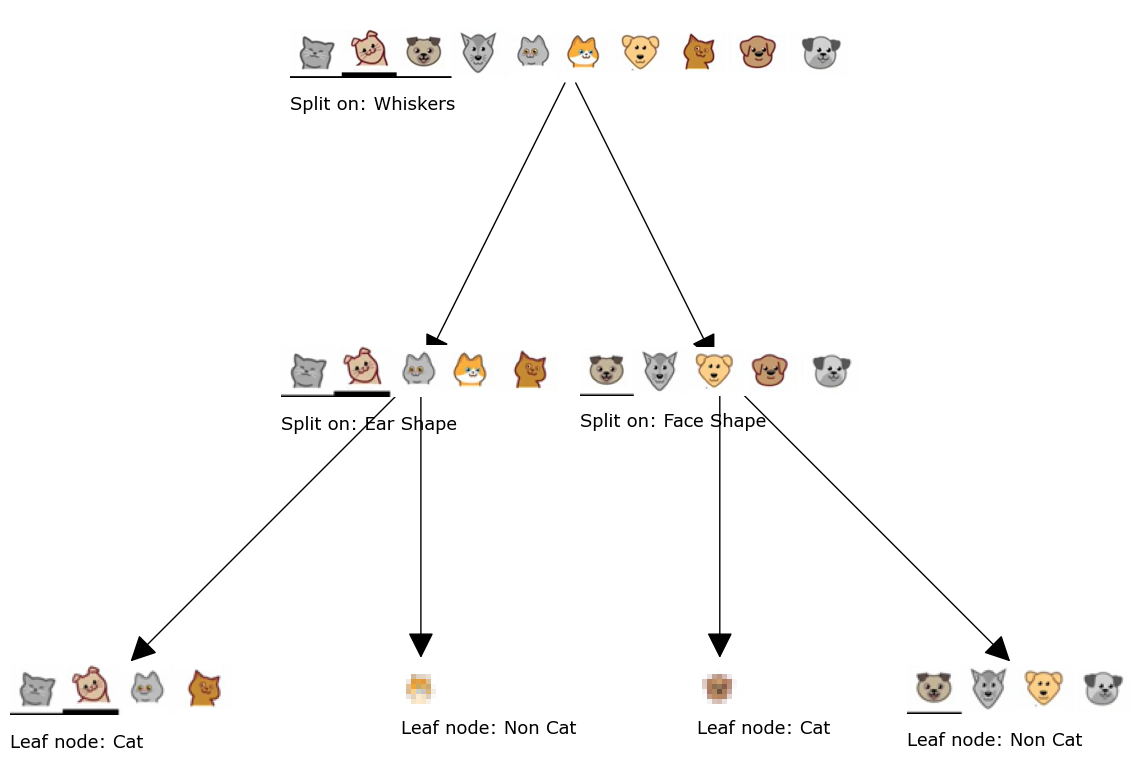

In [49]:
tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=2, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)